In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/disease_growth_level.csv')

In [3]:
df.head(10)

,date,time,temperature,humidity,ventilation,light_intensity,ph,disease growth possibility level
0,6/14/2018,8:30,22.40,82,low,high,6.9,High
1,6/14/2018,11:40,14.29,61,high,medium,8.6,Low
2,6/14/2018,14:30,13.47,86,low,medium,8.7,Moderate
3,6/14/2018,17:40,12.84,60,high,medium,8.1,Low
4,6/15/2018,8:30,27.84,83,low,high,6.8,High
5,6/15/2018,11:40,11.71,57,high,low,9.0,Low
6,6/15/2018,14:30,31.68,69,low,high,5.2,Moderate
7,6/15/2018,17:40,28.50,79,low,high,5.5,High
8,6/16/2018,8:30,24.68,51,high,high,6.4,Moderate
9,6/16/2018,11:40,7.70,50,high,low,8.5,Low


In [4]:
df.shape

(7124, 8)

In [5]:
df.isnull().sum()

date                                0
time                                0
temperature                         0
humidity                            0
ventilation                         6
light_intensity                     6
ph                                  6
disease growth possibility level    0
dtype: int64

In [12]:
df['ventilation'] = df['ventilation'].fillna(df['ventilation'].mode())

In [13]:
df['light_intensity'] = df['light_intensity'].fillna(df['light_intensity'].mode())

In [14]:
df.ph = df.ph.fillna(df.ph.mean())

In [15]:
df.isnull().sum()

date                                0
time                                0
temperature                         0
humidity                            0
ventilation                         6
light_intensity                     6
ph                                  0
disease growth possibility level    0
dtype: int64

In [16]:
df.ventilation.unique()

array(['low', 'high', 'medium', nan], dtype=object)

In [17]:
df.light_intensity.unique()

array(['high', 'medium', 'low', nan], dtype=object)

In [23]:
df.groupby('ventilation')['ventilation'].head(20)

0        low
1       high
2        low
3       high
4        low
5       high
6        low
7        low
8       high
9       high
10       low
11      high
12      high
13      high
14       low
15       low
16      high
17       low
18      high
19    medium
20      high
21      high
22      high
23       low
24    medium
25      high
26      high
27    medium
28    medium
29       low
30    medium
31       low
32      high
33      high
34    medium
35       low
36      high
37      high
38       low
39    medium
40    medium
41    medium
42      high
43    medium
45    medium
49    medium
58       low
59    medium
61    medium
62    medium
64    medium
68    medium
70       low
72    medium
75    medium
77       low
83       low
89       low
90    medium
93       low
Name: ventilation, dtype: object

In [24]:
df.isnull().sum()

date                                0
time                                0
temperature                         0
humidity                            0
ventilation                         6
light_intensity                     6
ph                                  0
disease growth possibility level    0
dtype: int64

In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

date                                0
time                                0
temperature                         0
humidity                            0
ventilation                         0
light_intensity                     0
ph                                  0
disease growth possibility level    0
dtype: int64

In [28]:
df.duplicated().sum()

119

In [29]:
df.drop_duplicates(keep='first',inplace=True)

In [30]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['date', 'time', 'temperature', 'humidity', 'ventilation',
       'light_intensity', 'ph', 'disease growth possibility level'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              7124 non-null   object 
 1   time                              7124 non-null   object 
 2   temperature                       7124 non-null   float64
 3   humidity                          7124 non-null   int64  
 4   ventilation                       7118 non-null   object 
 5   light_intensity                   7118 non-null   object 
 6   ph                                7118 non-null   float64
 7   disease growth possibility level  7124 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 445.4+ KB


In [31]:
df.describe()

,temperature,humidity,ph
count,6999.000000,6999.000000,6999.000000
mean,16.303043,68.821403,7.638020
std,8.313153,13.893991,1.263309
min,5.000000,50.000000,5.000000
25%,9.645000,58.000000,6.400000
50%,14.080000,66.000000,8.200000
75%,22.610000,78.000000,8.600000
max,35.000000,100.000000,9.000000


<Axes: >

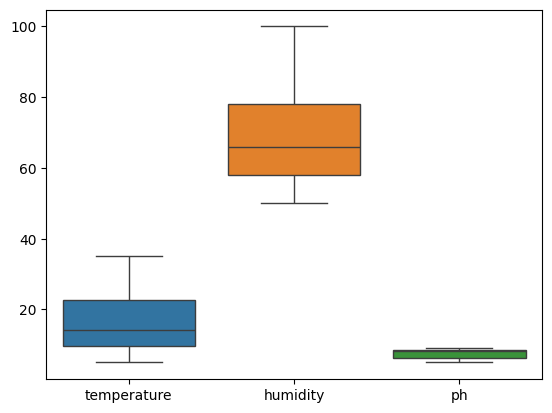

In [32]:
sns.boxplot(df)

In [33]:
df['disease growth possibility level'].value_counts()

disease growth possibility level
Low         3222
Moderate    2510
High        1267
Name: count, dtype: int64

In [35]:
df.date.unique()

array(['6/14/2018', '6/15/2018', '6/16/2018', ..., '3/29/2023',
       '3/30/2023', '3/31/2023'], dtype=object)

In [36]:
df.drop('date',axis=1,inplace=True)

In [37]:
df.time = pd.to_datetime(df.time)
df['hour'] = df.time.dt.hour
df['minute'] = df.time.dt.minute

In [38]:
df.head()

,time,temperature,humidity,ventilation,light_intensity,ph,disease growth possibility level,hour,minute
0,2024-06-23 08:30:00,22.40,82,low,high,6.9,High,8,30
1,2024-06-23 11:40:00,14.29,61,high,medium,8.6,Low,11,40
2,2024-06-23 14:30:00,13.47,86,low,medium,8.7,Moderate,14,30
3,2024-06-23 17:40:00,12.84,60,high,medium,8.1,Low,17,40
4,2024-06-23 08:30:00,27.84,83,low,high,6.8,High,8,30


In [39]:
df.drop('time',axis=1,inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ventilation'] = le.fit_transform(df['ventilation'])
df['light_intensity'] = le.fit_transform(df['light_intensity'])
df['disease growth possibility level'] = le.fit_transform(df['disease growth possibility level'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7123
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   temperature                       6999 non-null   float64
 1   humidity                          6999 non-null   int64  
 2   ventilation                       6999 non-null   object 
 3   light_intensity                   6999 non-null   object 
 4   ph                                6999 non-null   float64
 5   disease growth possibility level  6999 non-null   object 
 6   hour                              6999 non-null   int32  
 7   minute                            6999 non-null   int32  
dtypes: float64(2), int32(2), int64(1), object(3)
memory usage: 437.4+ KB


<Axes: >

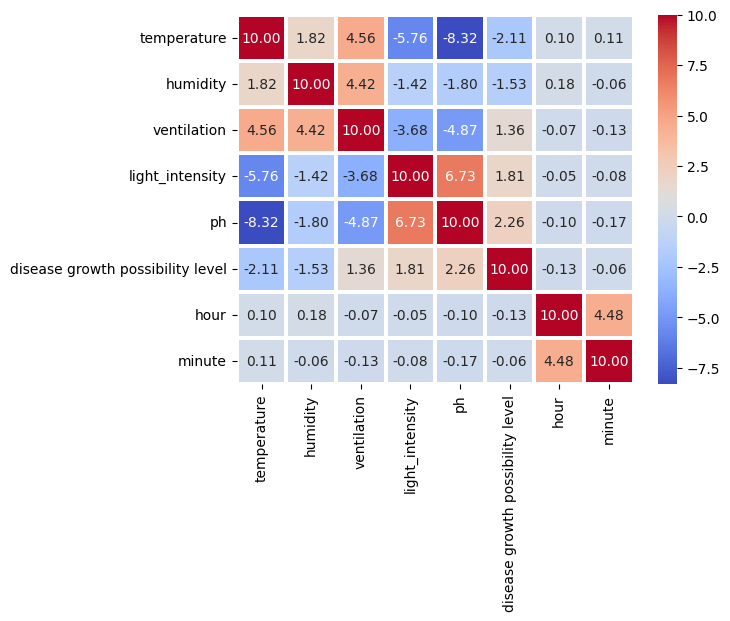

In [42]:
sns.heatmap(df.corr()*10,annot=True,cmap='coolwarm',linecolor='white',linewidths=1.5,fmt='.2f')

In [134]:
df.head()

,temperature,humidity,ventilation,light_intensity,ph,disease growth possibility level,hour,minute
0,22.40,82,1,0,6.9,0,8,30
1,14.29,61,0,2,8.6,1,11,40
2,13.47,86,1,2,8.7,2,14,30
3,12.84,60,0,2,8.1,1,17,40
4,27.84,83,1,0,6.8,0,8,30


<Axes: xlabel='ventilation', ylabel='disease growth possibility level'>

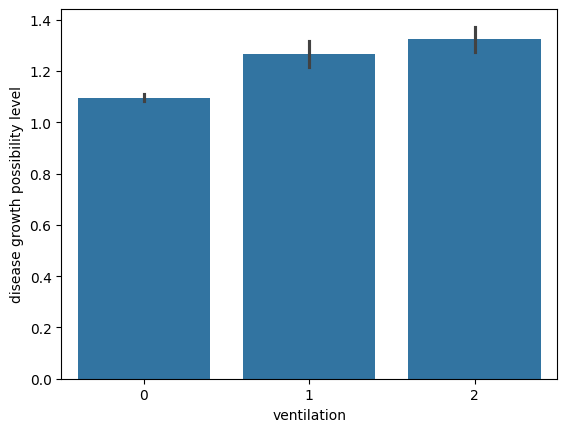

In [43]:
sns.barplot(x='ventilation',y='disease growth possibility level',data=df)

<Axes: xlabel='light_intensity', ylabel='disease growth possibility level'>

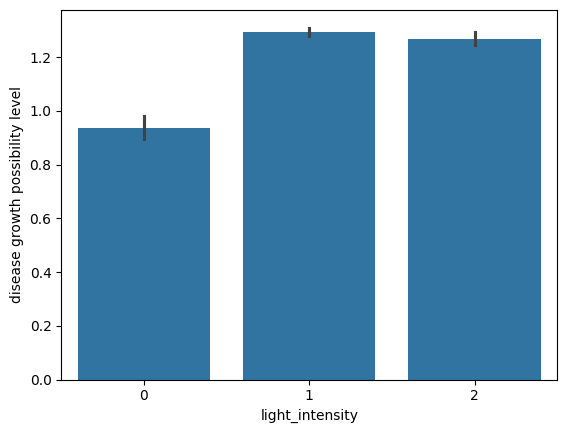

In [44]:
sns.barplot(x='light_intensity',y='disease growth possibility level',data=df)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, '5.0'),
  Text(1, 0, '5.1'),
  Text(2, 0, '5.2'),
  Text(3, 0, '5.3'),
  Text(4, 0, '5.4'),
  Text(5, 0, '5.5'),
  Text(6, 0, '5.6'),
  Text(7, 0, '5.7'),
  Text(8, 0, '5.8'),
  Text(9, 0, '5.9'),
  Text(10, 0, '6.0'),
  Text(11, 0, '6.1'),
  Text(12, 0, '6.2'),
  Text(13, 0, '6.3'),
  Text(14, 0, '6.4'),
  Text(15, 0, '6.5'),
  Text(16, 0, '6.6'),
  Text(17, 0, '6.7'),
  Text(18, 0, '6.8'),
  Text(19, 0, '6.9'),
  Text(20, 0, '7.0'),
  Text(21, 0, '8.0'),
  Text(22, 0, '8.1'),
  Text(23, 0, '8.2'),
  Text(24, 0, '8.3'),
  Text(25, 0, '8.4'),
  Text(26, 0, '8.5'),
  Text(27, 0, '8.6'),
  Text(28, 0, '8.7'),
  Text(29, 0, '8.8'),
  Text(30, 0, '8.9'),
  Text(31, 0, '9.0')])

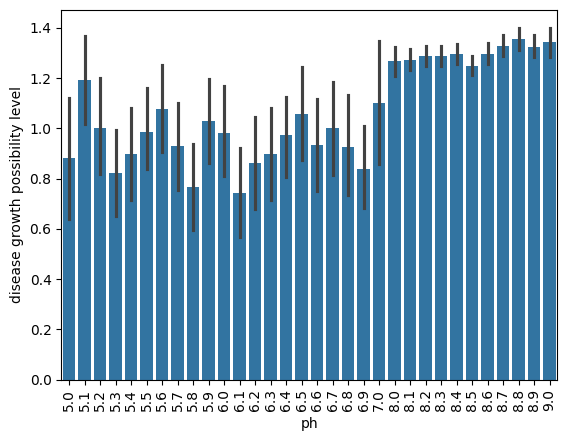

In [46]:
sns.barplot(x='ph',y='disease growth possibility level',data=df)
plt.xticks(rotation=90)

<Axes: xlabel='temperature', ylabel='disease growth possibility level'>

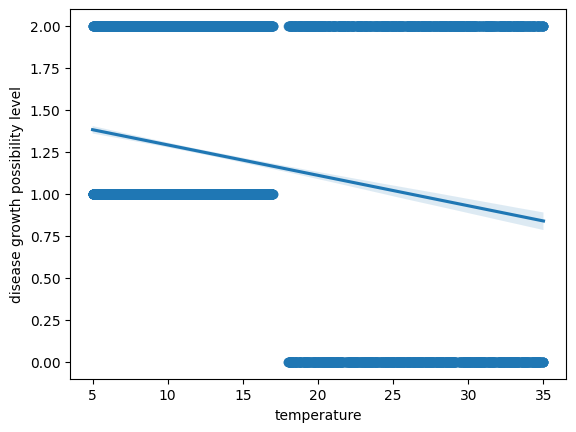

In [48]:
sns.regplot(x='temperature',y='disease growth possibility level',data=df)

<Axes: xlabel='humidity', ylabel='disease growth possibility level'>

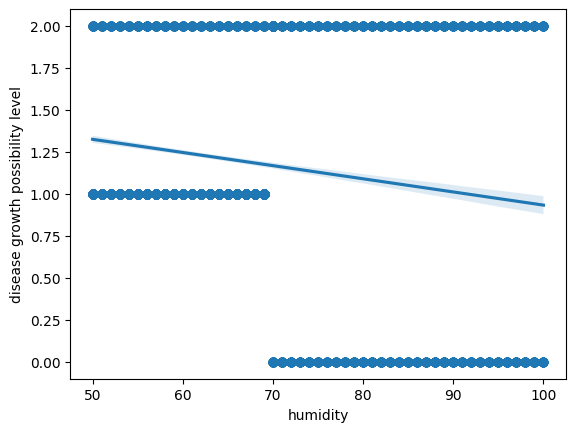

In [49]:
sns.regplot(x='humidity',y='disease growth possibility level',data=df)

<Axes: xlabel='light_intensity', ylabel='disease growth possibility level'>

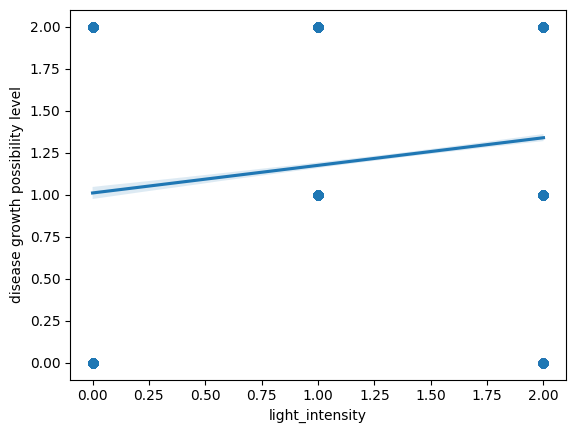

In [50]:
sns.regplot(x='light_intensity',y='disease growth possibility level',data=df)

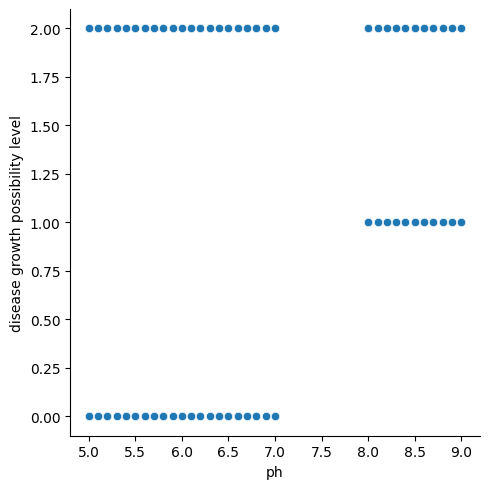

In [53]:
sns.relplot(x='ph',y='disease growth possibility level',data=df)

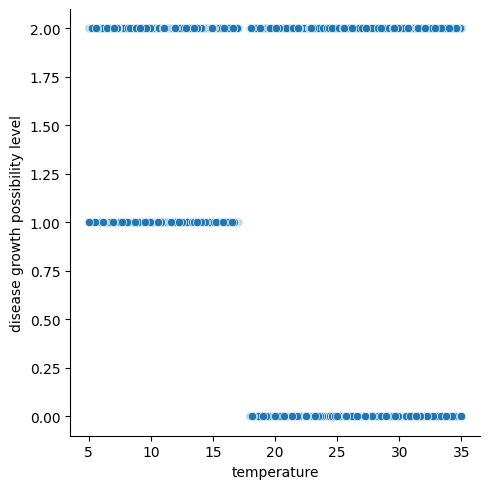

In [54]:
sns.relplot(x='temperature',y='disease growth possibility level',data=df)

<Axes: xlabel='humidity', ylabel='disease growth possibility level'>

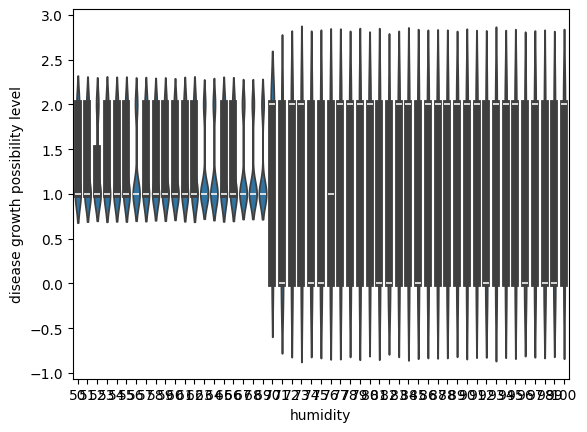

In [55]:
sns.violinplot(x='humidity',y='disease growth possibility level',data=df)

<Axes: xlabel='light_intensity', ylabel='disease growth possibility level'>

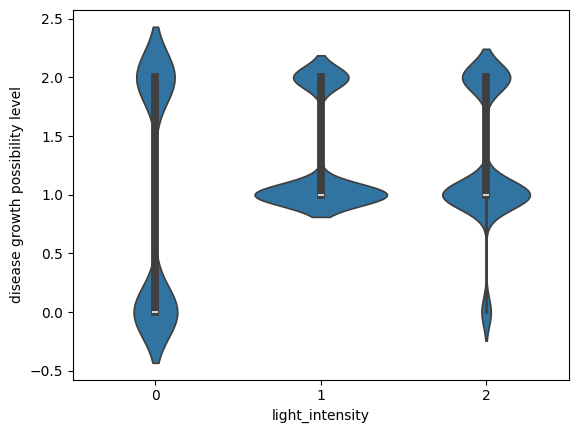

In [56]:
sns.violinplot(x='light_intensity',y='disease growth possibility level',data=df)

In [57]:
X = df.drop('disease growth possibility level',axis=1)
y = df['disease growth possibility level']

In [58]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smk = SMOTETomek(random_state=42)
X,y = smk.fit_resample(X,y)

In [59]:
X.shape,y.shape

((9664, 7), (9664,))

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Nu-SVC

In [87]:
from sklearn.svm import NuSVC
clf = NuSVC()
clf.fit(X_train,y_train)

NuSVC()

In [88]:
y_pred = clf.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))

0.9316614420062695


In [90]:
print(confusion_matrix(y_test,y_pred))

[[ 999    0   37]
 [   0 1083    0]
 [  46  135  890]]


In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1036
           1       0.89      1.00      0.94      1083
           2       0.96      0.83      0.89      1071

    accuracy                           0.93      3190
   macro avg       0.94      0.93      0.93      3190
weighted avg       0.93      0.93      0.93      3190



# MultinomialNB

In [93]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
# Check if X_train contains negative values and adjust accordingly
if (X_train < 0).any():
    # Option 1: Shift values to be non-negative if it makes sense for your data
    X_train_shifted = X_train - X_train.min()
    mnb.fit(X_train_shifted, y_train)

    # Option 2: Use a different classifier that handles negative values
    # For example, Gaussian Naive Bayes for continuous data
    # from sklearn.naive_bayes import GaussianNB
    # gnb = GaussianNB()
    # gnb.fit(X_train, y_train)
else:
    mnb.fit(X_train, y_train)

In [94]:
y_pred3 = mnb.predict(X_test)

In [95]:
print(accuracy_score(y_test,y_pred3))

0.7304075235109718


In [96]:
print(confusion_matrix(y_test,y_pred3))

[[1011   11   14]
 [   0 1083    0]
 [ 441  394  236]]


In [97]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.70      0.98      0.81      1036
           1       0.73      1.00      0.84      1083
           2       0.94      0.22      0.36      1071

    accuracy                           0.73      3190
   macro avg       0.79      0.73      0.67      3190
weighted avg       0.79      0.73      0.67      3190



# BernouilliNB

In [100]:
from sklearn.naive_bayes import BernoulliNB # Fixed the typo in module name
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

In [101]:
y_pred4 = bnb.predict(X_test)

In [102]:
print(accuracy_score(y_test,y_pred4))

0.8269592476489028


In [103]:
print(confusion_matrix(y_test,y_pred4))

[[1010    0   26]
 [   0 1083    0]
 [ 432   94  545]]


In [104]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.70      0.97      0.82      1036
           1       0.92      1.00      0.96      1083
           2       0.95      0.51      0.66      1071

    accuracy                           0.83      3190
   macro avg       0.86      0.83      0.81      3190
weighted avg       0.86      0.83      0.81      3190



In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False],
    'binarize' : [0.0, 0.5, 1.0]
}


In [107]:
grid_search = GridSearchCV(bnb, param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0], 'binarize': [0.0, 0.5, 1.0],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [108]:
grid_search.best_params_

{'alpha': 0.1, 'binarize': 0.0, 'fit_prior': True}

In [109]:
grid_search.best_score_

0.8382764526504868

In [110]:
best_params = grid_search.best_params_
best_bnb = BernoulliNB(**best_params)
best_bnb.fit(X_train, y_train)

BernoulliNB(alpha=0.1)

In [111]:
y_pred5 = best_bnb.predict(X_test)

In [112]:
print(accuracy_score(y_test,y_pred5))

0.8269592476489028


# RidgeClassifier

In [113]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

RidgeClassifier()

In [114]:
y_pred6 = ridge.predict(X_test)

In [115]:
print(accuracy_score(y_test,y_pred6))

0.8297805642633229


In [116]:
print(confusion_matrix(y_test,y_pred6))

[[ 956    0   80]
 [   0 1083    0]
 [ 257  206  608]]


In [125]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1036
           1       0.84      1.00      0.91      1083
           2       0.88      0.57      0.69      1071

    accuracy                           0.83      3190
   macro avg       0.84      0.83      0.82      3190
weighted avg       0.84      0.83      0.82      3190



In [118]:
grid_p = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'max_iter': [100, 200, 300]
}




In [119]:
grid_search2 = GridSearchCV(ridge, grid_p, cv=5,scoring='accuracy')
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.5, 1.0],
                         'class_weight': ['balanced', None],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300], 'random_state': [42],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='accuracy')

In [120]:
grid_search2.best_params_

{'alpha': 0.1,
 'class_weight': 'balanced',
 'fit_intercept': False,
 'max_iter': 100,
 'random_state': 42,
 'solver': 'auto'}

In [121]:
grid_search2.best_score_

0.8396656979346314

In [122]:
grid_search2.best_estimator_

RidgeClassifier(alpha=0.1, class_weight='balanced', fit_intercept=False,
                max_iter=100, random_state=42)

In [123]:
grid_search2.score(X_test,y_test)

0.8297805642633229

In [124]:
grid_search2.score(X_train,y_train)

0.840129749768304

# ElasticNet Regression as Penality

In [126]:
from sklearn.linear_model import LogisticRegression

# Initialize the classifier with elastic net penalty
clf = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred7 = clf.predict(X_test)

In [127]:
print(accuracy_score(y_test,y_pred7))

0.9288401253918496


In [128]:
print(confusion_matrix(y_test,y_pred7))

[[ 967    0   69]
 [   0 1062   21]
 [  79   58  934]]


In [129]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1036
           1       0.95      0.98      0.96      1083
           2       0.91      0.87      0.89      1071

    accuracy                           0.93      3190
   macro avg       0.93      0.93      0.93      3190
weighted avg       0.93      0.93      0.93      3190



In [131]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Define base estimators
estimators = [
    ('lr', LogisticRegression()),
    ('svm', SVC()),
    ('dt', DecisionTreeClassifier())
]

# Initialize StackingClassifier with a final estimator
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred8 = clf.predict(X_test)

# Evaluate performance (e.g., accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred8)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [132]:
print(confusion_matrix(y_test,y_pred8))

[[1036    0    0]
 [   0 1083    0]
 [   0    0 1071]]


In [133]:
print(classification_report(y_test,y_pred8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00      1083
           2       1.00      1.00      1.00      1071

    accuracy                           1.00      3190
   macro avg       1.00      1.00      1.00      3190
weighted avg       1.00      1.00      1.00      3190



In [135]:
input_data = (22.40,82,1,0,6.9,8,30)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = clf.predict(input_data_reshaped)
print(prediction)

[0]


In [137]:
import pickle
pickle.dump(clf,open('model_mushroom.pkl','wb'))